In [479]:
#import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [480]:
#Read the csv file

bike_df=pd.read_csv(r"C:\Users\vinay\Downloads\day.csv")

In [481]:
#Verify the file read

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [482]:
# Verify the shape & columns of the data frame

bike_df.shape

(730, 16)

In [483]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [484]:
# Number of rows is 730 and there are no null values in any of these columns

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [485]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [486]:
#Drop duplicates if any

bike_df.drop_duplicates(inplace=True)

In [487]:
#Checking the shape again

bike_df.shape

#There are no duplicates in the data frame

(730, 16)

In [488]:
#Lets now proceed to clean the dataframe and drop unnecessary columns for analysis

In [489]:
#Lets copy the dataframe

bike_df_copy = bike_df.copy()

In [490]:
bike_df_copy.shape

(730, 16)

In [491]:
bike_df_copy.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [492]:
bike_df_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [493]:
#Lets go ahead and replace season, year, month, weekday, weather to its respective categorical values

In [494]:

bike_df_copy['season']=bike_df_copy['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [495]:
bike_df_copy['mnth'] = bike_df_copy['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [496]:
bike_df_copy['weekday'] = bike_df_copy['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [497]:
bike_df_copy['weathersit'] = bike_df_copy['weathersit'].map({1:'clear',2:'misty & cloudy',3:'light snow',4:'heavy rain'})

In [498]:
bike_df_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 2000x2500 with 0 Axes>

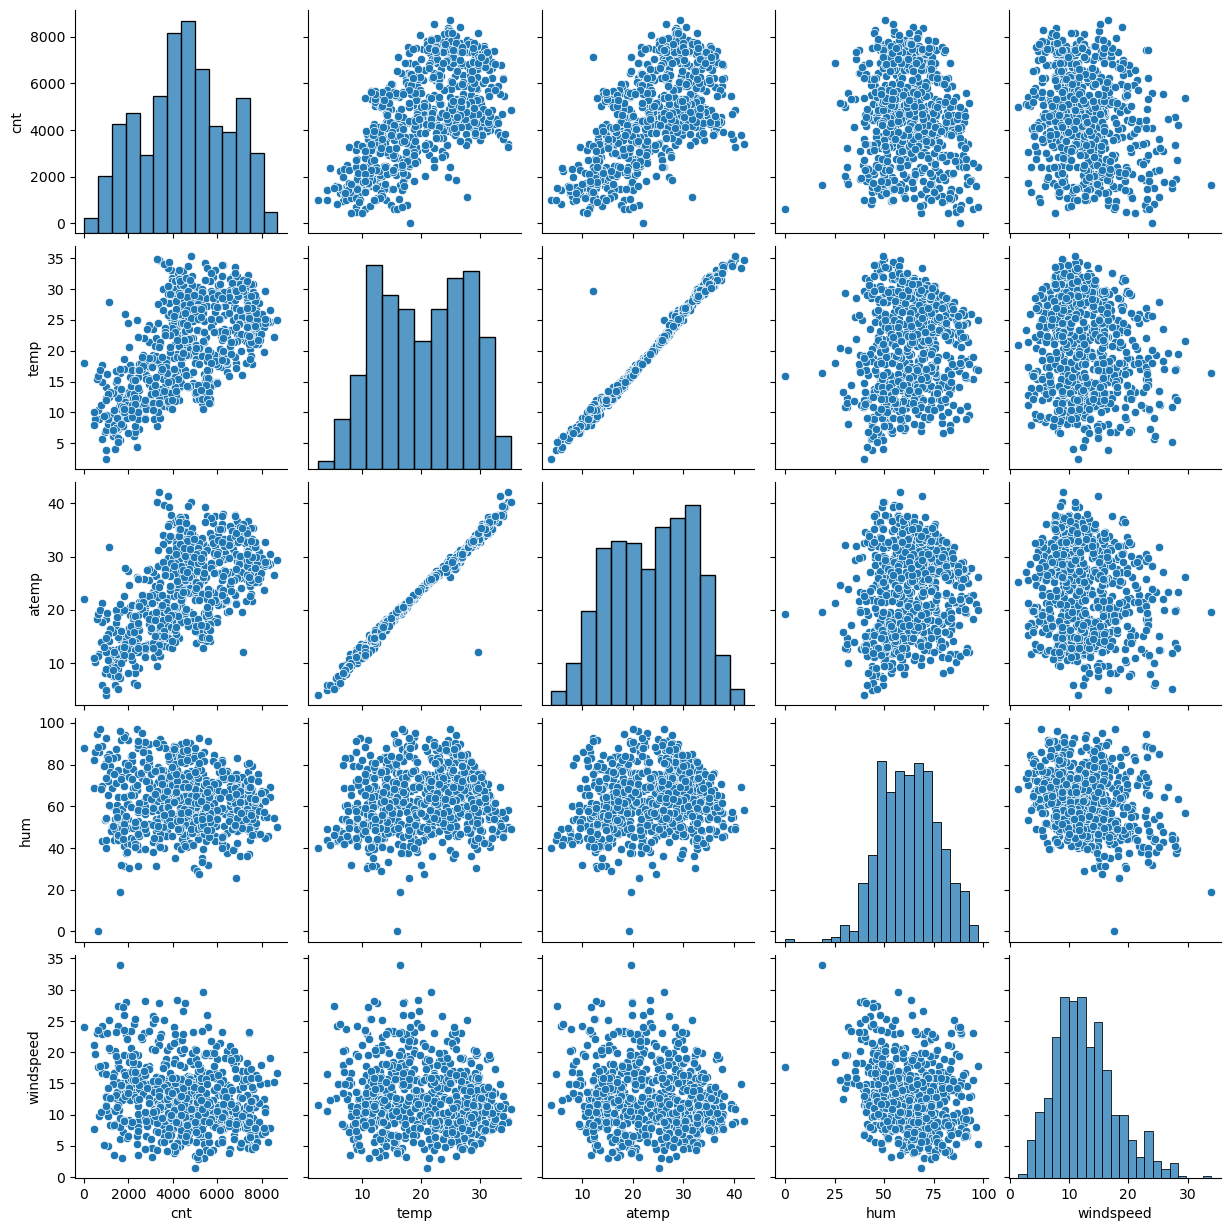

In [499]:
plt.figure(figsize = (20,25))
sns.pairplot(data=bike_df_copy,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

temp and atemp are linearly correlated, however both of the variables denote the same information, so its ideal to drop one. 

Lets visulaize the categorical data using box plot

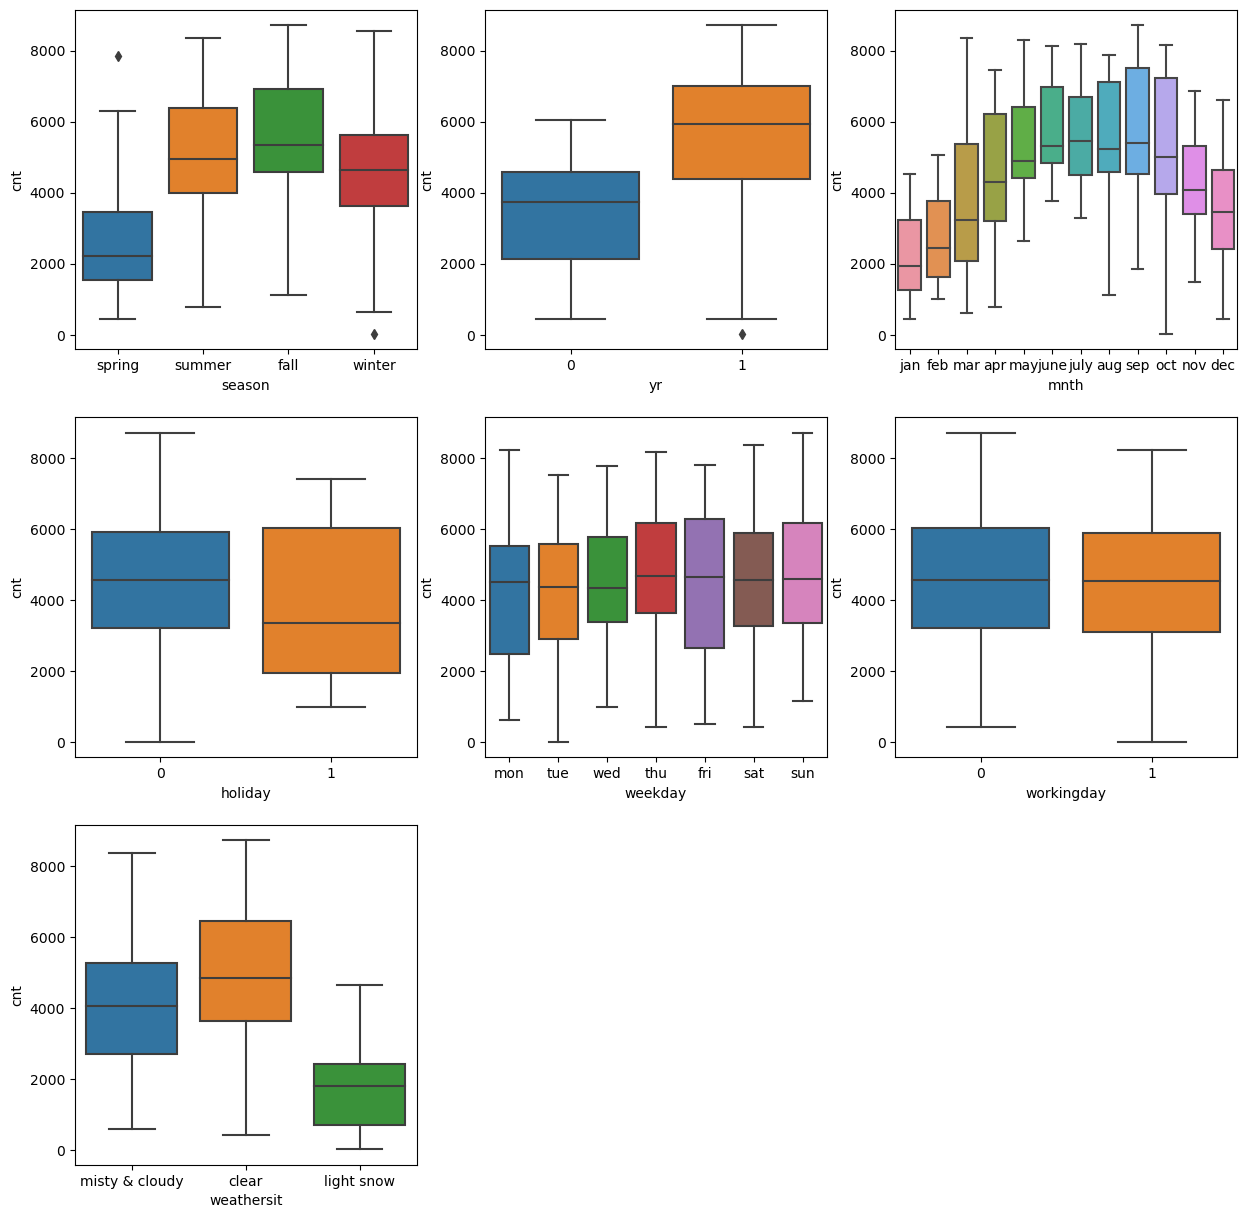

In [500]:
vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df_copy, x=i[1], y='cnt')
plt.show()

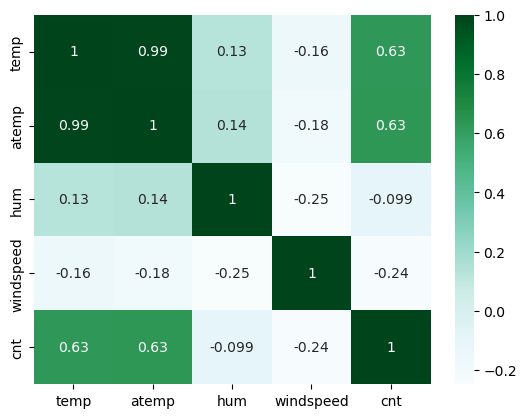

In [501]:
sns.heatmap(bike_df_copy[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True,cmap='BuGn')
plt.show()

In [502]:
bike_df_copy = pd.get_dummies(data=bike_df_copy,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)

In [503]:
bike_df_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow,weathersit_misty & cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [504]:
len(bike_df_copy.columns)

30

In [505]:
y=bike_df_copy.pop('cnt')

#X is our train dataset without target variable
X=bike_df_copy

#Split the dataset to 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [506]:
#Now lets check the shape of the train test

In [507]:
X_train.shape

(511, 29)

In [508]:
X_test.shape

(219, 29)

In [509]:
y_train

653    7534
576    7216
426    4066
728    1796
482    4220
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 511, dtype: int64

In [510]:
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
y_train = y_train.values.reshape(-1,1)
y_train = scaler.fit_transform(y_train)


In [511]:
#Verify the values now
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow,weathersit_misty & cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.029354,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [512]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [513]:
#Lets target 50% of features to start with (ie, 15)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [514]:
#Print features and their respective ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_light snow', True, 1),
 ('weathersit_misty & cloudy', True, 1)]

In [515]:
#Features which we will be considering

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow',
       'weathersit_misty & cloudy'],
      dtype='object')

In [516]:
rfe_columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow',
       'weathersit_misty & cloudy']

In [517]:
#Function to calculate VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#Function to build model
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# Model 1

In [518]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          2.29e-189
Time:                        16:17:59   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [519]:
calculateVIF(X_train[rfe_columns])

,Features,VIF
3,hum,30.93
2,temp,17.82
4,windspeed,4.73
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_misty & cloudy,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


# Model 2

In [520]:
rfe_columns=['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow',
       'weathersit_misty & cloudy']

calculateVIF(X_train[rfe_columns])

,Features,VIF
2,temp,5.18
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.08
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_july,1.59
13,weathersit_misty & cloudy,1.56


In [521]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.41e-186
Time:                        16:17:59   Log-Likelihood:                 505.44
No. Observations:                 511   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [522]:
rfe_columns.remove('mnth_nov')

In [523]:
calculateVIF(X_train[rfe_columns])

#There is no significant change in the VIF and all the fetaures are well within the range

,Features,VIF
2,temp,5.15
3,windspeed,4.63
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.08
6,season_winter,2.06
8,mnth_jan,1.65
9,mnth_july,1.59
12,weathersit_misty & cloudy,1.56
10,mnth_sep,1.34


# Model 3

In [524]:
#Nows lets build the model

build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.05e-186
Time:                        16:17:59   Log-Likelihood:                 502.99
No. Observations:                 511   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -918.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [525]:
rfe_columns.remove("mnth_dec")

In [526]:
calculateVIF(X_train[rfe_columns])

#No major change in VIFs notes, lets build the model now

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.08
6,season_winter,1.79
7,mnth_jan,1.61
8,mnth_july,1.59
11,weathersit_misty & cloudy,1.56
9,mnth_sep,1.34


# Model 4

In [527]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          3.46e-187
Time:                        16:18:00   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [528]:
rfe_columns.remove("mnth_jan")

In [529]:
calculateVIF(X_train[rfe_columns])

,Features,VIF
2,temp,5.10
3,windspeed,4.61
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.79
7,mnth_july,1.58
10,weathersit_misty & cloudy,1.55
8,mnth_sep,1.34
9,weathersit_light snow,1.08


# Model 5

In [530]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          2.09e-187
Time:                        16:18:00   Log-Likelihood:                 499.05
No. Observations:                 511   AIC:                            -974.1
Df Residuals:                     499   BIC:                            -923.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [531]:
rfe_columns.remove("mnth_july")

In [532]:
calculateVIF(X_train[rfe_columns])

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_misty & cloudy,1.55
7,mnth_sep,1.23
8,weathersit_light snow,1.08
1,holiday,1.04


# Model 6

In [533]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          6.20e-187
Time:                        16:18:00   Log-Likelihood:                 495.07
No. Observations:                 511   AIC:                            -968.1
Df Residuals:                     500   BIC:                            -921.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [534]:
rfe_columns.remove("season_spring")

In [535]:
calculateVIF(X_train[rfe_columns])

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
8,weathersit_misty & cloudy,1.48
5,season_winter,1.38
6,mnth_sep,1.20
7,weathersit_light snow,1.08
1,holiday,1.03


# Model 7

In [536]:
build_model(rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.13e-186
Time:                        16:18:00   Log-Likelihood:                 491.55
No. Observations:                 511   AIC:                            -963.1
Df Residuals:                     501   BIC:                            -920.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [537]:
#Append the feature which we dropped for building Model 7

rfe_columns.append("season_spring")


In [538]:
calculateVIF(X_train[rfe_columns])

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
9,season_spring,1.99
4,season_summer,1.90
5,season_winter,1.63
8,weathersit_misty & cloudy,1.55
6,mnth_sep,1.23
7,weathersit_light snow,1.08
1,holiday,1.04


In [539]:
#Build Final Model
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

lr = build_model_sk(X_train[rfe_columns],y_train)

print(lr.intercept_,lr.coef_)

[0.19015575] [[ 0.23467547 -0.09681584  0.47845383 -0.14799826  0.06222802  0.09595539
   0.09082329 -0.28574366 -0.07921031 -0.05501736]]


In [540]:
#Lets predict the y value for training set

In [541]:
y_train_pred = lr.predict(X_train[rfe_columns])

<Axes: ylabel='Density'>

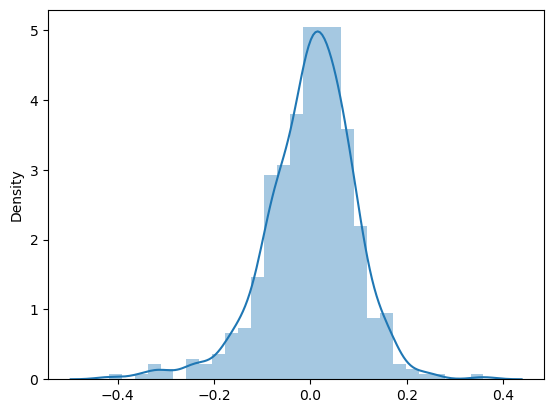

In [542]:
#Lets try plotting a distribution plot for the predicted and actual values

sns.distplot(y_train-y_train_pred)

#The value mean is centered to zero, which is expected and we can assume this model is significant


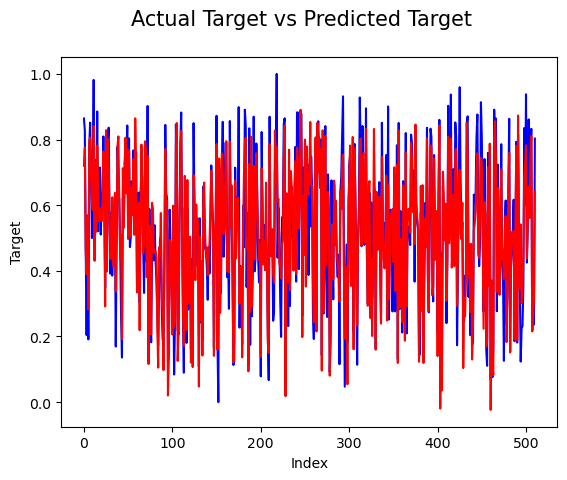

In [543]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual Target vs Predicted Target', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

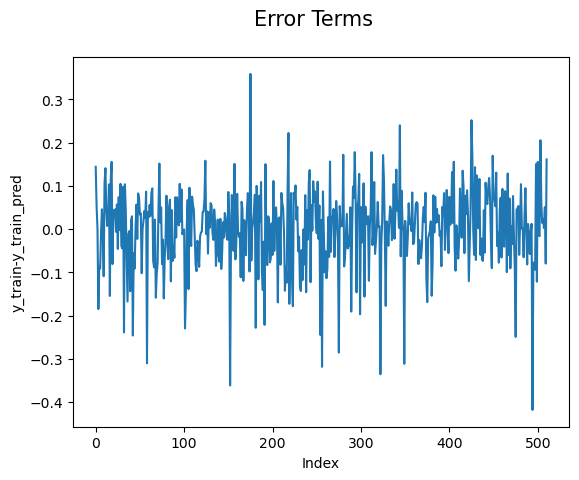

In [544]:
#Lets plot error for every prediction

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [545]:
#Calculate the r2 score for the predicted train set

r2_score(y_train,y_train_pred)


0.832689927245098

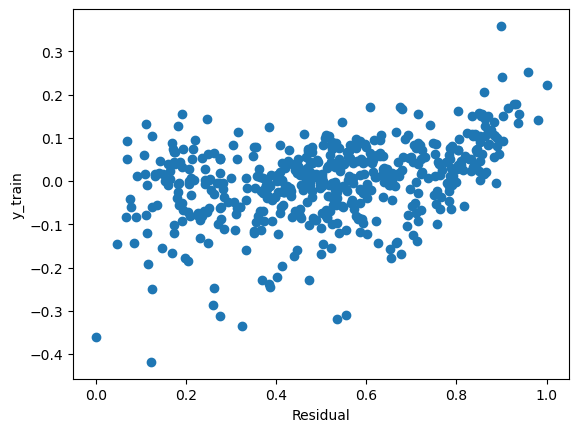

In [546]:
#Lets check the residual errors and see if its scattered and doesnt have any visible patterns

residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#As expected, the error is scattered across the plot and no visible patterns seen

# Predictions for test data

In [547]:
#Lets start with normalize the x_test and y_test data

num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
y_test = y_test.values.reshape(-1,1)
y_test = scaler.fit_transform(y_test)


In [548]:
#Predict y_test using the model built
y_test_pred = lr.predict(X_test[rfe_columns])

In [549]:
r2_final=r2_score(y_test,y_test_pred)
print(r2_final)

0.7946504398898716


Text(0, 0.5, 'y_test_pred')

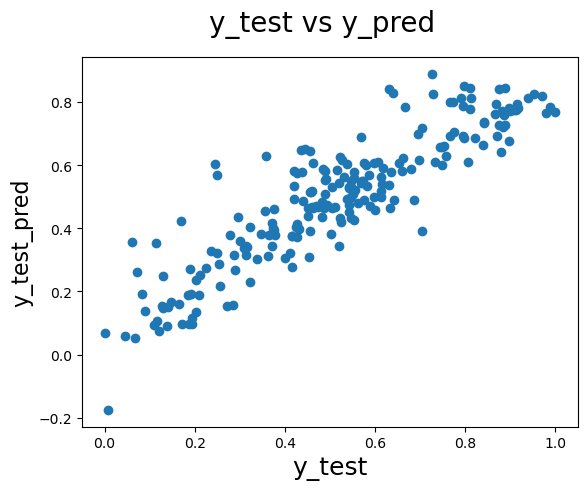

In [550]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

#The plot shows that test and predicted values are as expected 

In [551]:
#Lets plot the error residuals for the test data

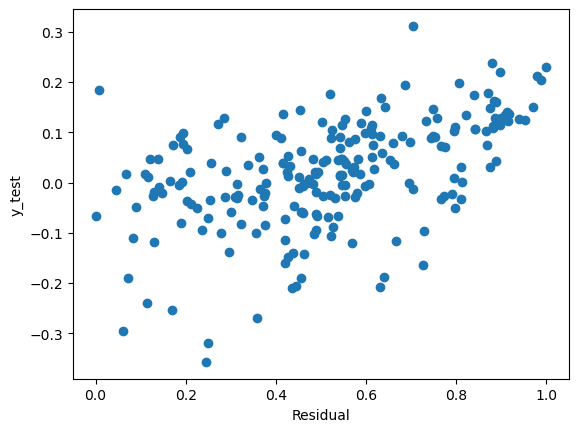

In [552]:

test_residual = (y_test - y_test_pred)
plt.scatter(y_test,test_residual)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()